In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torch.autograd import Variable

In [2]:
#N_STEPS = 5
SEED = 1
N_GAMES = 1000
N_ACTIONS = 2
N_INPUTS = 4

states = []
actions = []
rewards = []

env = gym.make('CartPole-v0')
env.seed(SEED)


[1]

In [5]:
model = ActorCritic()
optimizer = optim.Adam(model.parameters(), lr=3e-3)

In [9]:
for m in model.parameters():
    print(m)
    
test_model(model)

Parameter containing:
-0.3165  0.1104  0.3473 -0.5679
-0.0794 -0.2747  1.7229  0.3133
 0.0617  0.0912 -0.4923 -0.5562
-0.0413  0.2262 -0.2084 -0.2201
 0.2308  0.0411  0.9193  0.3575
-0.3636 -0.3166 -0.4932 -0.2593
-0.2372 -0.2273  0.5840  0.3355
-0.3726  0.3583  0.0291 -0.2367
 0.4792 -0.1949  0.2392 -0.4930
 0.5584  0.0187  1.2138  0.4004
 0.4938 -0.1633 -0.2778 -0.3069
 0.2036  0.1608 -0.2685  0.1544
 0.0372  0.0918 -0.5183 -0.4853
 0.0976  0.1364 -0.3834 -0.0214
-0.0770  0.3507 -0.1549 -0.4884
-0.2180  0.1663 -0.0243 -0.2121
 0.1494  0.4632 -0.7563  0.0139
 0.2834  0.3296  0.5109  0.3168
-0.3227  0.2681  0.7809  0.4069
-0.1231 -0.0569  0.4945 -0.2541
 0.4568  0.0952  0.4106  0.2142
-0.3658  0.4328 -0.3125  0.1748
 0.0720  0.8420  1.3125 -0.3830
 0.3677  0.4929 -0.2872  0.0391
-0.4611  0.1742  0.0857 -0.1591
 0.4101  0.2922  0.4440  0.1545
-0.2200  0.4908  0.2658  0.1718
-0.1861  0.3742 -0.0755  0.2079
-0.1560 -0.2155  1.2811 -0.1277
 0.4211 -0.1254 -0.4485 -0.2714
-0.1369 -0.2666 -0

10

array([ 2.3])

<ipython-input-6-f8d72bf760d7>:47: SyntaxWarning: name 'rewards' is used prior to global declaration
  global rewards


Training. Score was  9

Rewards [-5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
1.00000e-02 *
  7.6068
  7.9205
  7.6224
  7.4608
  7.2973
  7.0543
  7.3635
  7.0835
  7.0164
[torch.FloatTensor of size 9x1]

Training. Score was  15

Rewards [1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
1.00000e-02 *
  1.7147
  0.8240
 -0.4366
  0.9157
 -0.3619
 -1.5582
 -2.8787
 -1.4416
 -2.8260
 -4.3563
 -6.3431
 -4.5636
 -3.1507
 -1.8324
 -1.0697
[torch.FloatTensor of size 15x1]

Training. Score was  21

Rewards [5.136933816377228, 4.596593129308031, 3.996214588


Rewards [-1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -4.4145
 -3.3937
 -4.4106
 -6.3815
 -8.9678
-12.0326
-15.4863
-19.1295
-22.9162
-26.7978
-30.7855
-34.8874
[torch.FloatTensor of size 12x1]

Training. Score was  30

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -3.2221
 -3.5862
 -3.2647
 -3.2384
 -3.7386
 -4.9146
 -6.8620
 -4.6596
 -6.4620
 -8.7612
-11.3958
-14.2173
-17.3190

Training. Score was  13

Rewards [-0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -6.4533
 -6.8988
 -8.2018
 -6.8829
 -6.4439
 -7.1209
 -8.5159
-10.5187
-12.6658
-14.9178
-17.2530
-19.6823
-22.1921
[torch.FloatTensor of size 13x1]

Training. Score was  11

Rewards [-2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -6.7093
 -7.4211
 -8.8784
-11.0103
-13.3622
-15.8029
-18.3149
-20.9350
-23.6549
-26.4752
-29.3923
[torch.FloatTensor of size 11x1]

Training. Score was  10

Rewards [-3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000

Training. Score was  51

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
-4.0163
-5.2484
-4.0612
-5.3967
-7.6465
-5.6259
-7.9755
-5.9443
-8.4034
-6.3845
-4.8418
-6.9013
-5.2932
-4.4684
-5.7659
-8.0960
-6.3873
-5.0533
-7.0537
-9.6718
[torch.FloatTensor of size 20x1]

Training. Score was  11

Rewards [-2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -3.6826
 -3.8662
 -4.8165
 -6.3939
 -8.3700
-10.5136
-12.725

Training. Score was  15

Rewards [1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -3.1893
 -3.6760
 -3.1950
 -4.5425
 -3.1899
 -3.6542
 -3.1974
 -4.5685
 -6.8138
 -9.6436
-12.7717
-15.9907
-19.3123
-22.7325
-26.2585
[torch.FloatTensor of size 15x1]

Training. Score was  13

Rewards [-0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -3.0213
 -3.8886
 -3.0254
 -4.0973
 -6.1184
 -4.1002
 -6.1571
 -8.8425
-11.8719
-15.0032
-18.2337
-21.5526
-24.9756
[torch.FloatTensor of 


Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -6.3858
 -9.6774
 -6.4803
 -3.9755
 -3.0479
 -4.0529
 -3.0331
 -4.2107
 -6.7183
 -9.5935
 -6.9486
 -9.9181
 -7.3685
-10.4506
 -7.9867
-11.1855
 -8.8461
 -6.7488
 -5.0176
 -3.8521
[torch.FloatTensor of size 20x1]

Training. Score was  10

Rewards [-3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -3.0814
 -3.0545
 -5.3394
 -8.2806
 -5.7828
 -8.8106
-11.9822
-15.2594
-18.5886
-16.3


Rewards [0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -2.0613
 -3.7365
 -2.0579
 -3.7537
 -7.1005
-10.9819
 -7.3085
-11.3293
-15.5292
-19.8278
-16.3669
-20.8535
-25.4413
-30.1526
[torch.FloatTensor of size 14x1]

Training. Score was  15

Rewards [1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -1.9927
 -3.9271
 -2.0106
 -4.0754
 -2.0363
 -3.2745
 -6.4267
-10.2051
-14.2740
-18.4484
-22.7540
-19.1846
-23.6965
-28.3339
-33.1089
[torch.FloatTenso

Training. Score was  21

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -2.0773
 -0.9385
 -1.7227
 -3.9287
 -6.7943
 -3.8659
 -1.5886
 -0.9714
 -2.5030
 -5.9850
 -9.8536
 -6.6296
 -3.6828
 -7.3884
-11.5471
-15.9161
-13.0413
-10.2018
-14.7643
-12.1446
[torch.FloatTensor of size 20x1]

Training. Score was  59

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.25764

Training. Score was  140

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -8.7667
 -9.9569
 -9.0359
-10.2764
 -9.2969
 -9.0640
 -9.4376
-10.6870
 -9.6364
 -9.3223
 -9.7035
-10.8657
 -9.8363
 -9.6025
-10.7989
 -9.7680
-11.2687
-13.5359
-16.8306
-14.7290
[torch.FloatTensor of size 20x1]

Training. Score was  52

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.2576

Not training, score of  200
Training. Score was  13

Rewards [-0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -0.2433
 -1.1179
 -4.4230
 -8.1123
 -5.6643
 -9.5395
 -7.2328
 -5.0266
 -8.8891
 -6.8232
-10.8287
 -8.9463
 -7.1476
[torch.FloatTensor of size 13x1]

Training. Score was  103

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
-15.5943
-16.5528
-17.8324
-19.1


Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -5.4814
 -4.4933
 -6.8929
 -5.4187
 -8.4088
 -6.6448
 -5.8580
 -8.0672
 -6.7994
 -6.3184
 -6.3540
 -6.5231
 -6.7918
 -7.6107
 -9.9197
-13.3102
-11.5503
-10.0573
 -9.0934
-11.5520
[torch.FloatTensor of size 20x1]

Training. Score was  58

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.61960000

Training. Score was  141

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
-4.1712
-7.2183
-4.8094
-2.9449
-1.2987
-0.5342
-1.8133
-0.6447
-2.6683
-6.2278
-4.2944
-2.5108
-1.1298
-0.4801
-0.6762
-1.3899
-0.5737
-1.9109
-5.5674
-3.7252
[torch.FloatTensor of size 20x1]

Training. Score was  118

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.61

Training. Score was  174

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
-10.8773
-14.6000
-12.3038
-10.4828
 -9.4482
 -9.1446
 -9.9136
 -9.3423
-11.2130
 -9.6071
-10.3807
-12.1073
-10.6574
-10.1013
-10.7600
-12.4660
-10.9612
-12.6790
-15.5767
-13.1478
[torch.FloatTensor of size 20x1]

Training. Score was  161

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257

Training. Score was  153

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -7.1977
 -3.5296
 -1.1636
 -4.2549
 -1.5856
 -5.2616
 -2.3329
 -1.1340
 -3.1628
 -1.4485
 -4.2508
 -2.0728
 -5.6146
-10.6484
 -7.7010
-12.9980
-10.1995
 -7.5563
 -5.3318
-10.0505
[torch.FloatTensor of size 20x1]

Training. Score was  138

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257

Training. Score was  142

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -0.8974
 -0.6542
 -2.0106
 -4.9895
 -2.2786
 -0.8244
 -2.5910
 -6.0188
 -3.4781
 -7.1863
 -4.7805
 -8.8176
 -6.5253
 -4.4012
 -2.8046
 -6.0870
 -4.2577
 -3.0283
 -5.9020
-10.0853
[torch.FloatTensor of size 20x1]

Training. Score was  155

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257

Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Training. Score was  163

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -0.5441
 -0.0104
 -1.1360
 -5.5363
-11.6246
 -8.2551
 -4.9867
 -2.0675
 -0.0316
 -4.2938
 -1.3187
 -7.2169
 -4.1136
 -0.9960
 -7.1916
 -3.9835
-10.5884
 -7.4946
 -4.1885
-10.9093
[torch.FloatTensor of size 20x1]

Training. Score was  130

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.32912

Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Training. Score was  60

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.

Not training, score of  200
Not training, score of  200
Training. Score was  197

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
-14.8871
-14.3322
-15.4588
-15.0043
-16.0250
-15.7097
-17.1896
-16.3804
-17.0961
-18.6463
-17.8849
-17.8014
-19.0406
-18.4535
-19.7250
-19.1168
-20.4443
-19.7934
-21.2177
-20.5026
[torch.FloatTensor of size 20x1]

Not training, score of  200
Training. Score was  169

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9

Training. Score was  147

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -4.9346
 -9.0031
 -6.5367
-11.0289
 -8.4199
 -6.2481
 -4.4264
 -3.3118
 -2.5491
 -2.2366
 -3.0948
 -4.5613
 -6.6925
 -5.1040
 -7.3346
 -5.6856
 -4.6279
 -3.8058
 -4.9302
 -4.0619
[torch.FloatTensor of size 20x1]

Training. Score was  171

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257

Training. Score was  123

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
 -1.7781
 -0.3337
 -0.0106
 -0.8091
 -0.0629
 -0.1959
 -1.4702
 -0.1498
 -0.3866
 -2.6745
 -6.9493
 -4.3509
 -9.2003
 -6.7810
 -4.1296
 -2.1625
 -0.9231
 -3.5646
 -8.5681
-13.9530
[torch.FloatTensor of size 20x1]

Training. Score was  118

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257

Training. Score was  144

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004, -11.257640000000004, -13.619600000000004, -16.244000000000003, -19.160000000000004, -22.400000000000002, -26.0] 
State values Variable containing:
-2.3414
-6.2190
-2.5288
-0.0325
 0.1540
-1.1766
-0.0157
 0.1634
-0.3875
 0.1241
-0.0410
 0.0224
-1.7121
-5.7629
-3.4572
-1.6739
-5.7034
-3.7142
-1.8346
-6.2594
[torch.FloatTensor of size 20x1]

Not training, score of  200
Training. Score was  174

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600195, -1.2971814592400022, -2.5524238436000024, -3.9471376040000026, -5.496819560000003, -7.218688400000003, -9.131876000000004,

Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score 

Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Not training, score of  200
Training. Score was  135

Rewards [5.136933816377228, 4.596593129308031, 3.996214588120034, 3.329127320133371, 2.5879192445926344, 1.7643547162140383, 0.8492830180155982, -0.16746331331600

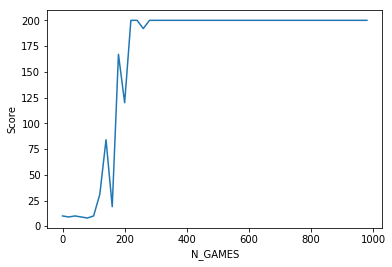

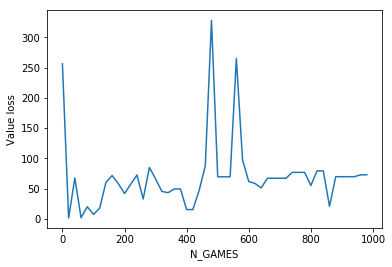

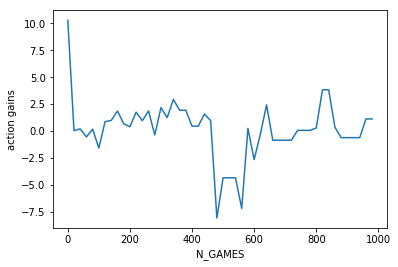

In [6]:
scores = []
num_games = []
value_losses = []
action_gains = []

for i in range(N_GAMES):
    
    del states[:]
    del actions[:]
    del rewards[:]
    
    state = env.reset() 
    done = False
    
    # act phase
    while not done:
        s = torch.from_numpy(state).float().unsqueeze(0)
        
        action_probs = model.get_action_probs(Variable(s))
        action = action_probs.multinomial().data[0][0]
        next_state, reward, done, _ = env.step(action)
        
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        
        state = next_state

    if len(rewards) < 200: # only reflecting/training on episodes where a failure occured. No training
        # signal in perfect games. 
        # Reflect phase
        print("Training. Score was ", len(rewards))

        R = []
        rr = rewards
        rr.reverse()

        next_return = -30 #if len(rewards) < 200 else 1 # unnecessary now, should just be 0
        # punish failure hard

        for r in range(len(rr)):
            this_return = rr[r] + next_return * .9
            R.append(this_return)
            next_return = this_return
        R.reverse()

        global rewards
        rewards = R
        
        # taking only the last 20 states before failure
        rewards = rewards[-20:]
        states = states[-20:]
        actions = actions[-20:]
        
        s = Variable(torch.FloatTensor(states))

        global state_values
        action_probs, state_values = model.evaluate_actions(s)

        action_log_probs = action_probs.log() 

        advantages = Variable(torch.FloatTensor(rewards)).unsqueeze(1) - state_values

        entropy = (action_probs * action_log_probs).sum(1).mean()

        a = Variable(torch.LongTensor(actions).view(-1,1))

        chosen_action_log_probs = action_log_probs.gather(1, a)

        action_gain = (chosen_action_log_probs * advantages).mean()

        value_loss = advantages.pow(2).mean()

        total_loss = value_loss - action_gain - 0.0001*entropy

        #total_loss /= len(rewards) # wow this allowed to reach high score faster. Wait. this shouldn't matter
        # bc we're using mean values. undoing now.

        optimizer.zero_grad()

        total_loss.backward()

        nn.utils.clip_grad_norm(model.parameters(), 0.5)

        optimizer.step()
        
        print("\nRewards", rewards, "\nState values",  state_values)
        
    else: print("Not training, score of ", len(rewards))

    if i % 20 == 0:
        s = test_model(model)
        scores.append(s)
        num_games.append(i)

        action_gains.append(action_gain.data.numpy()[0])
        value_losses.append(value_loss.data.numpy()[0])

        
plt.plot(num_games, scores)
plt.xlabel("N_GAMES")
plt.ylabel("Score")
#plt.title(EXP)
plt.show()

plt.plot(num_games, value_losses)
plt.xlabel("N_GAMES")
plt.ylabel("Value loss")
#plt.savefig("experiments/"+EXP_NAME+'/'+EXP)
plt.show()

plt.plot(num_games, action_gains)
plt.xlabel("N_GAMES")
plt.ylabel("action gains")
#plt.savefig("experiments/"+EXP_NAME+'/'+EXP)
plt.show()
    
    
env.close()



In [3]:
class ActorCritic(nn.Module):
    def __init__(self):
        super(ActorCritic, self).__init__()
        self.linear1 = nn.Linear(N_INPUTS, 64)
        self.linear2 = nn.Linear(64, 128)
        self.linear3 = nn.Linear(128, 64)
        
        self.actor = nn.Linear(64, N_ACTIONS)
        self.critic = nn.Linear(64, 1)
    
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        
        x = self.linear2(x)
        x = F.relu(x)
        
        x = self.linear3(x)
        x = F.relu(x)
        
        return x
    
    def get_action_probs(self, x):
        x = self(x)
        action_probs = F.softmax(self.actor(x))
        return action_probs
    
    def evaluate_actions(self, x):
        x = self(x)
        action_probs = F.softmax(self.actor(x))
        state_values = self.critic(x)
        return action_probs, state_values
        
        

In [4]:
def test_model(model):
    score = 0
    done = False
    env = gym.make('CartPole-v0')
    state = env.reset()
    global action_probs
    while not done:
        score += 1
        s = torch.from_numpy(state).float().unsqueeze(0)
        
        action_probs = model.get_action_probs(Variable(s))
        
        _, action_index = action_probs.max(1)
        action = action_index.data[0] 
        next_state, reward, done, thing = env.step(action)
        state = next_state
        
    return score
    

12.7.17 experiment. set up model from scratch. was having problems initially because
wasn't passing discounted returns into the past. There was no signal for model to grab 
on to, seeing as how it was just all ones. Model improved immediately after discounting 
future returns. consistently beat game during training after 7-12k games

12.15.17 WTF now it errors out with nans in the parameters?? looks like exploding/vanishing gradients. Trying gradient clipping. Gradient clipping solves it. Weird scores shoot up fast then back down. Hit 200 after 600 games. Scores really all over the place.

12.17 Dividing loss be length of rewards speeds training. Dividing inputs by their max value breaks it, probably bc max values are too big.

Rewards vs state values is relatively accurate. Much better than nstep version. At least they're in the ballpark and trend in the correct direction. state_values pretty much just converge on rewards values (which evens out due to discounting). So in essence model just learns rewards values and assigns that value to all states, regardless of state. Even states in which the game loses are marked as same value. Safest bet from model's perspective is to just predict the long term reward value every time. 

Why does nstep version blow up state_value predictions? They just keep getting bigger and bigger

epsilon makes sense when thinking how far back we want responsability to go. It cartpole, probably not very far so a low epsilon is probably better. All stable states look relatively the same--it would be hard to differentiate btwn a stable state that will end in 20 steps or a stable state that will end in 200 steps. Both stable states should be valued the same.

by epsilon, I mean gamma. bc i'm an amateur. 

Note: We were assigning value of 0 to last state indisciminantly, even if termination was due to max score of 200. Fixed now.


12.18
Problem: V(s) is not learning well. It's just predicting the steady state (based on gamma) for all states--even those right before failure. This is ok in non-nstep version bc we're not using v(s) to bootstrap, but it's a big problem with nstep models. Hypothesis: It's bc our steady-state samples, where no real signal is being providing, are overwhelming the frames directly before failure--frames with strong signal. ALso, those steady state frames have no variation, no signal. Approach: Oversample important frames. Take only the 15 frames prior to failure for training.

Result: wow after score of 200 remained 200 thereafter. makes sense bc we're not training it anymore. v(s) looks better, descending from 8 to 5, ideal would be 8 to 1. not enough spread in the v(s) estimates. Trying with window of 20 before failure, decreasing reward for ending state to -30. Success in terms of not training on no-signal data, failure in terms of capturing variability of v(s). 

Result: first run didn't catch at all. second run caught early and right to 200. v(s) now flattened out as before. 

Why can't we capture variability of v(s)? 

hypothesis: neural network isn't deep enough. 

Approach: change architecture to 64-128-64 instead of single 128.

Result: Didn't catch on first run of 500, but wow v(s) estimates look much better. Was that the case in other failed runs? Often blowing up gradients though.

Try reducing LR to 3e-3 from 3e-4. Result: This allows it to train. We're capturing range of about 0 to -12 or -20, which is good although ideal range would be 5 to -26.

Let's go back and try shallower net to see if also captures this range. Changing ONLY the model architecture back to 128. Keeping lr 3e-3 and failure reward of -30. Result: very little variation (about 3)! Probably reason: deeper network better captures variation. Although v(s) estimate less good with simpler model, simpler model appears to perform better (?)

Question: why does deeper model require smaller LR to not blow up gradients? Is it just bc there are more parameters so more opportunity for blowup?

Hypothesis: if deeper models better capture variation, an even deeper model will do even better. Instead of a three layer 64-128-64, let's try a 64-128-256-128-64. Again, changing ONLY model architecture.

Result: Hmm, sometimes capturing lots of variation. sometimes too much even. Takes much longer to reach 200. v(s) sometimes very good, sometimes very bad. 

I wonder how a two hidden layer model would do? Not capturing as much variation. about 8. Let's go back to 64-128-64 model and try with n-steps. First, verify model again: Verified. Notes: early on in training we're seeing some really nice progressions of v(s). Later on not so good, is that just selection bias bc we're only seeing failed episodes, and the episodes model fails on get harder and harder? 